In [5]:
from datetime import time
import thesisInitial.tariff as tf
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print('setup complete')

setup complete


In [48]:
from thesisInitial.cleaning_data import extract_data_from_house, extract_load
data = extract_data_from_house(64613, 'hot_water')

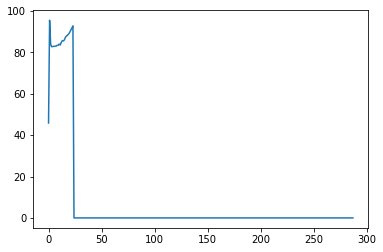

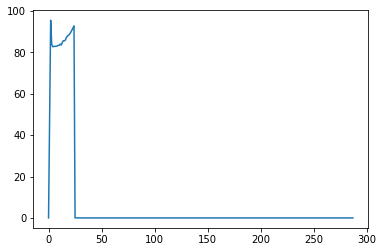

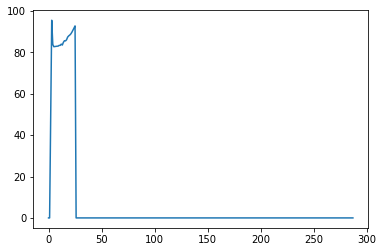

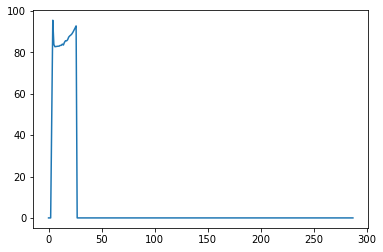

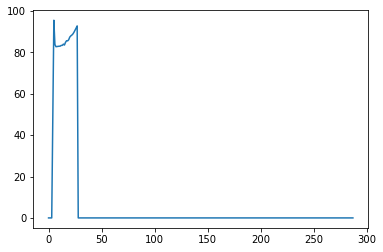

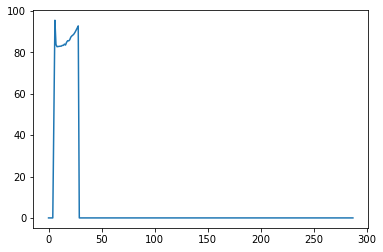

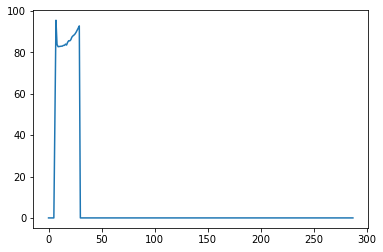

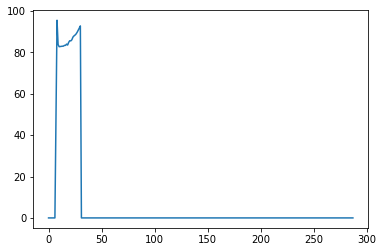

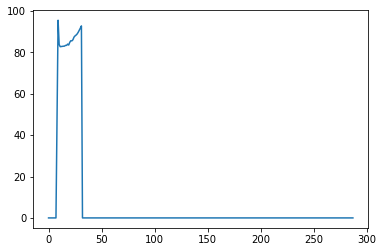

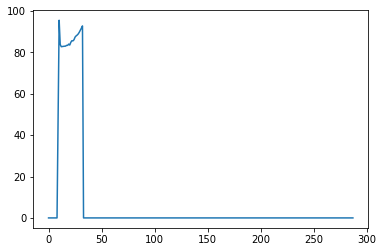

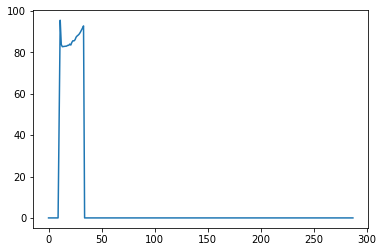

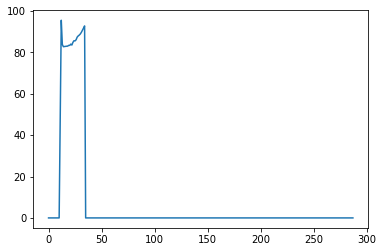

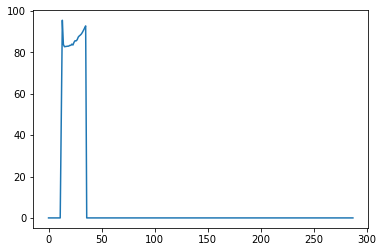

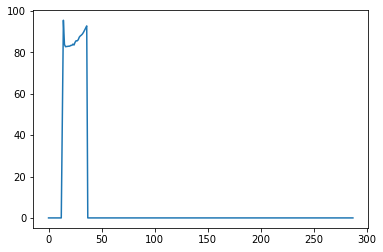

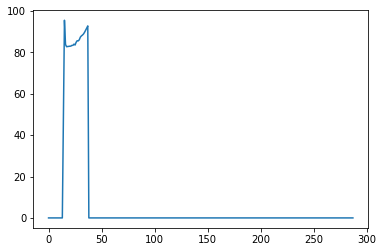

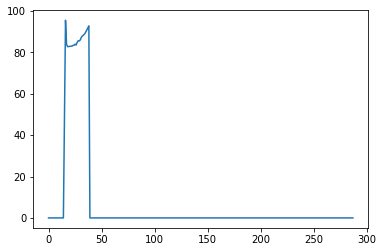

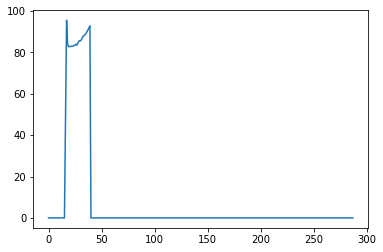

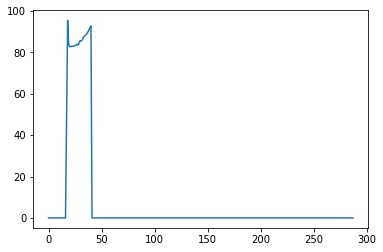

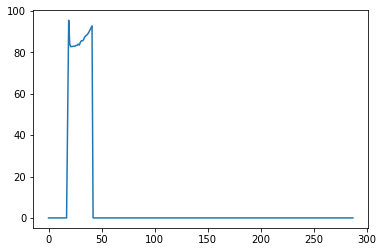

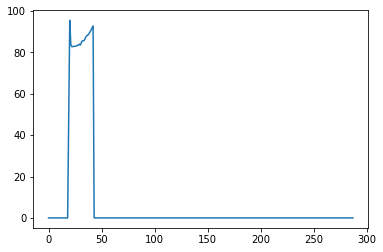

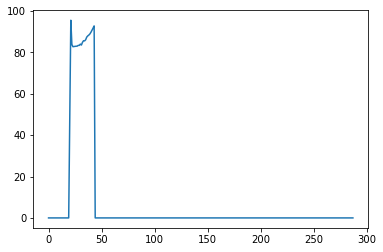

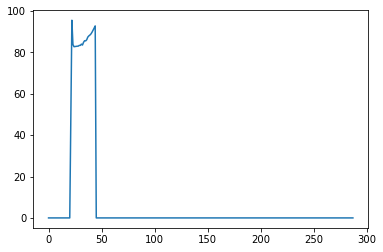

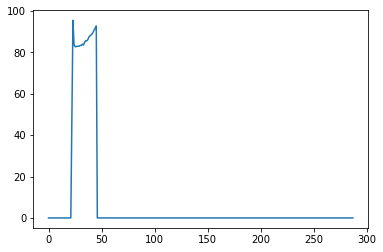

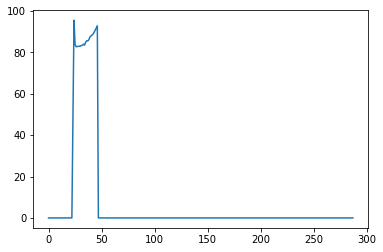

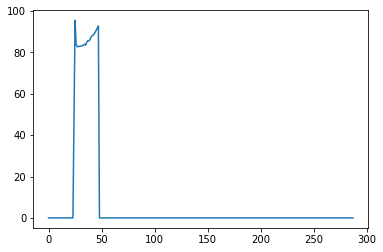

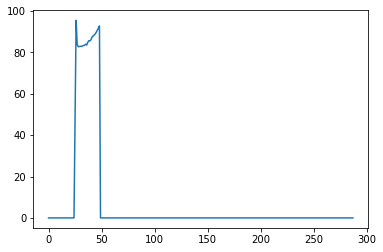

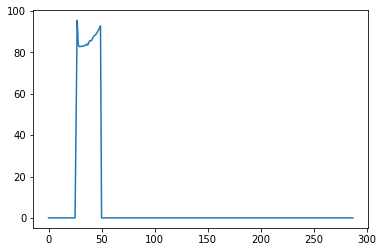

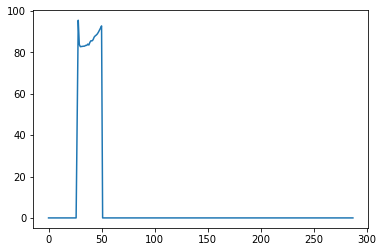

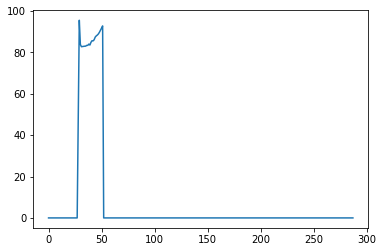

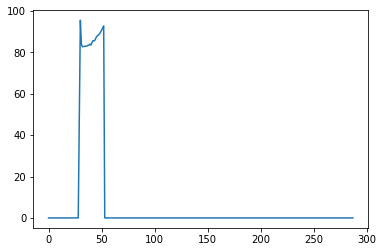

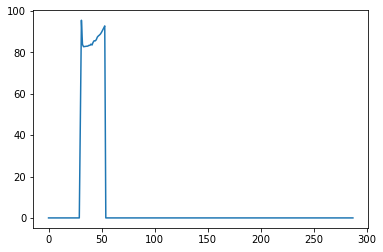

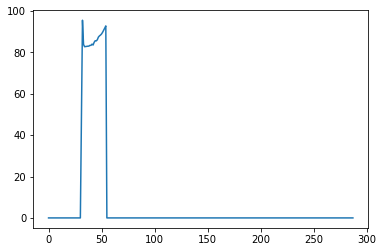

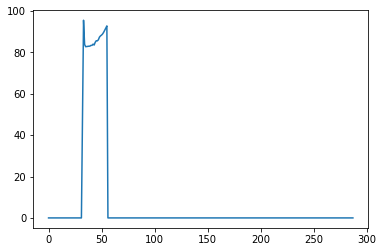

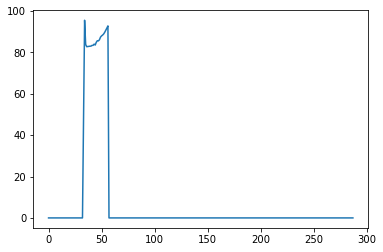

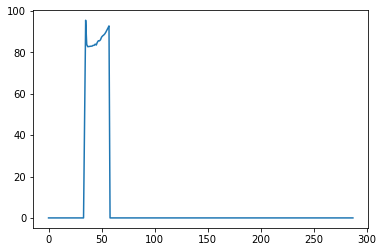

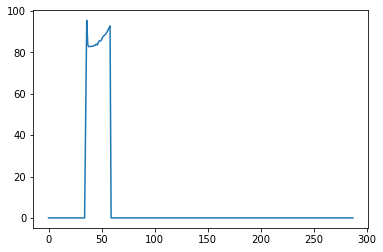

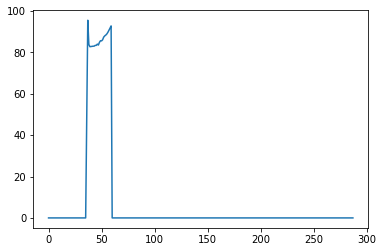

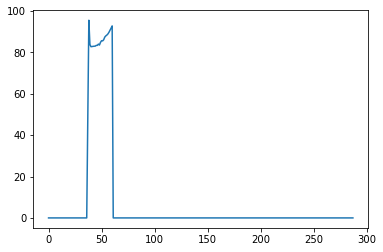

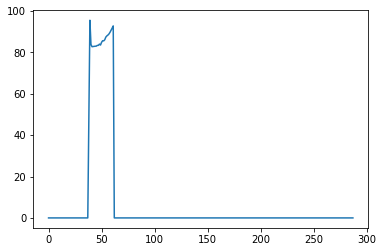

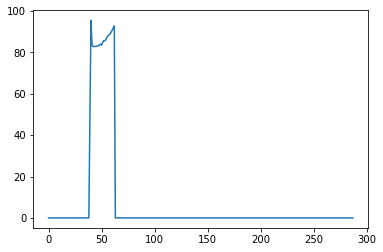

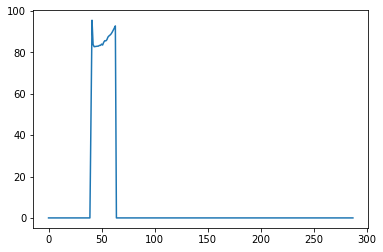

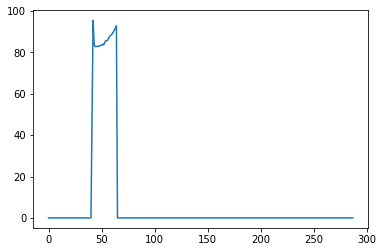

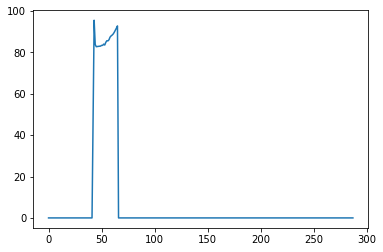

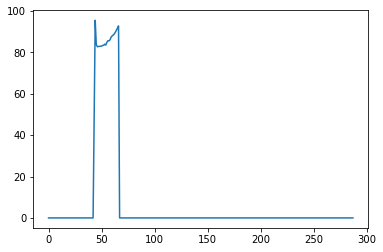

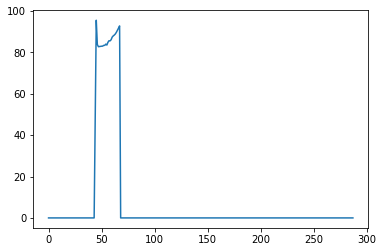

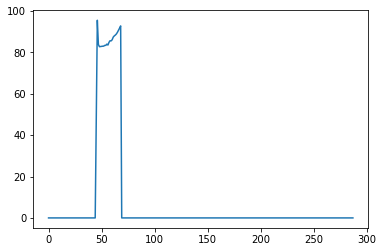

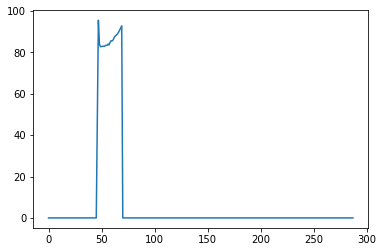

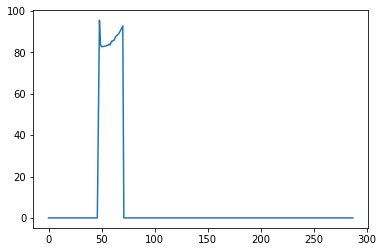

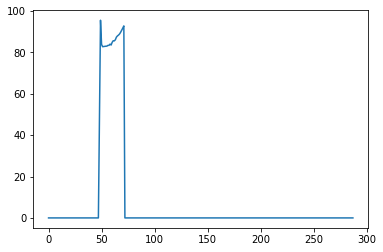

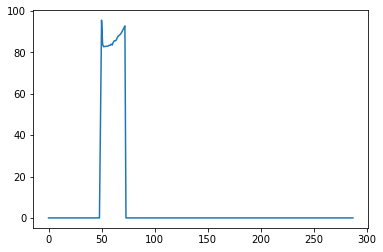

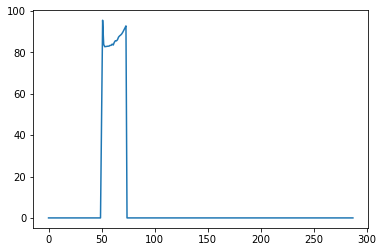

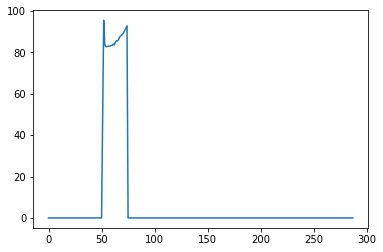

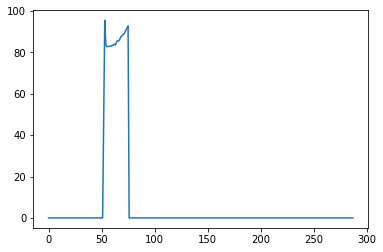

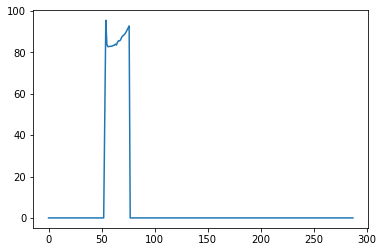

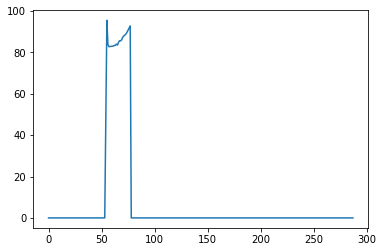

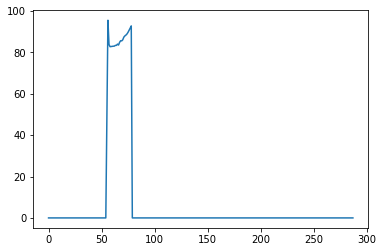

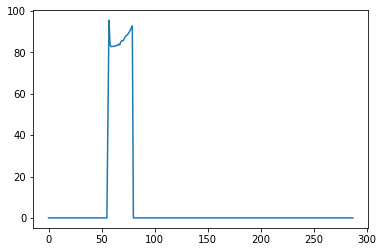

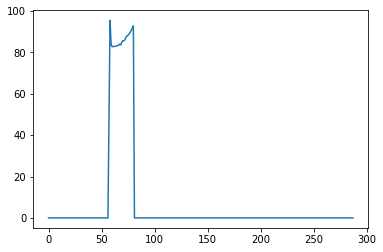

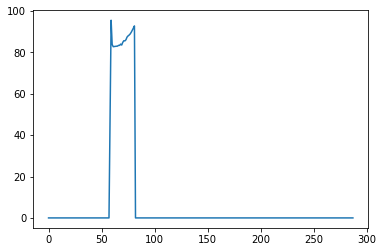

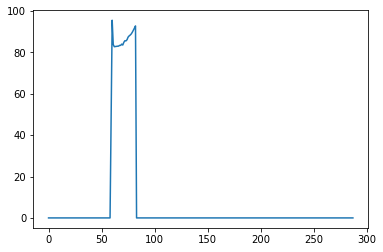

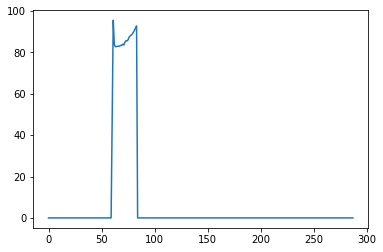

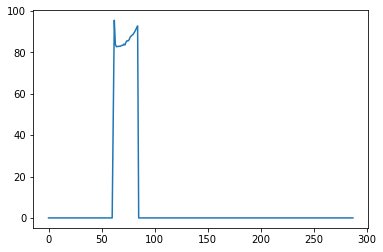

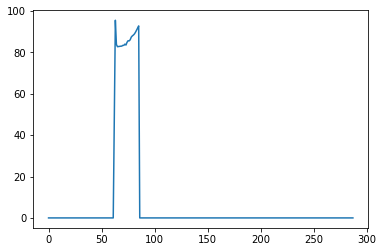

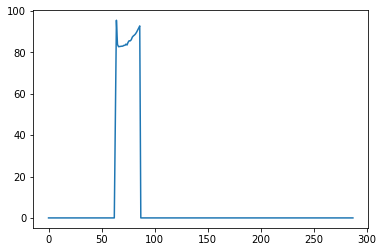

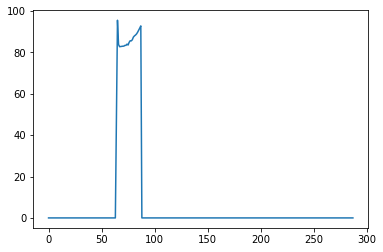

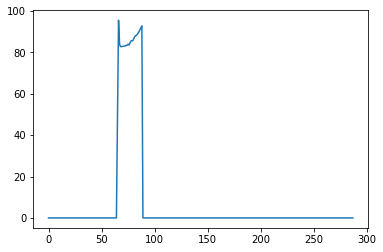

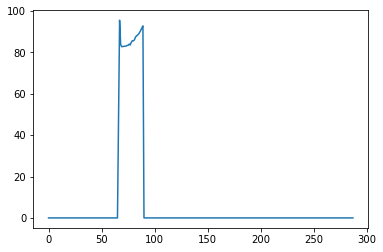

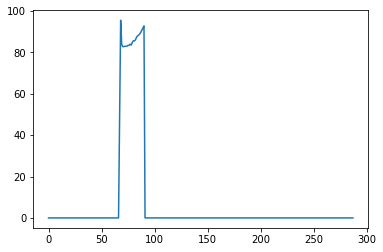

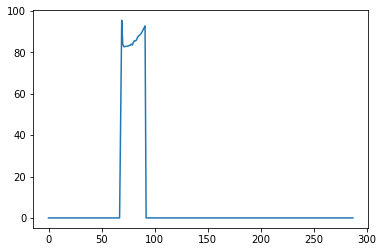

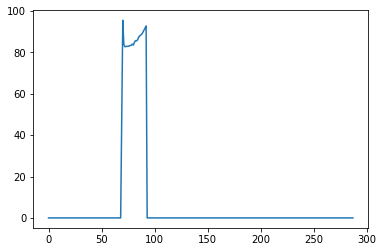

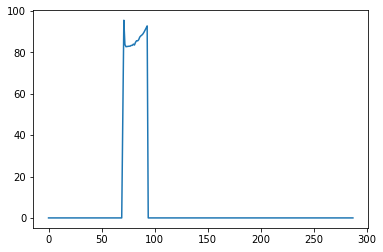

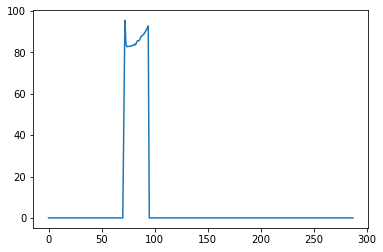

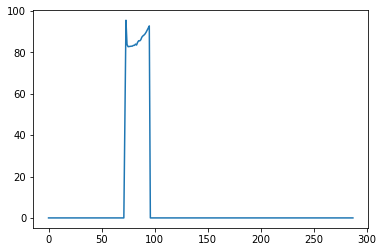

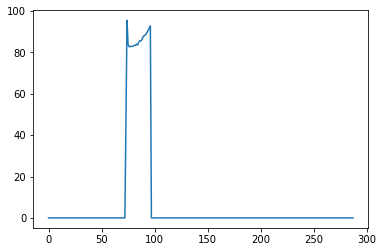

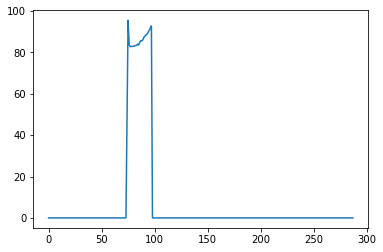

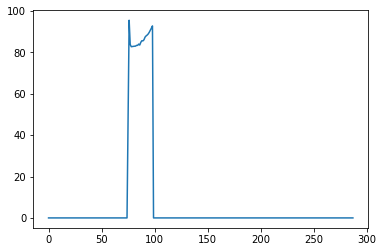

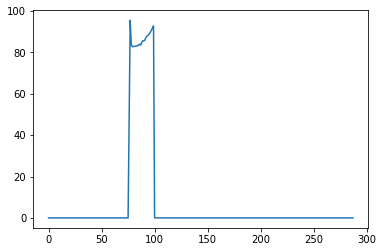

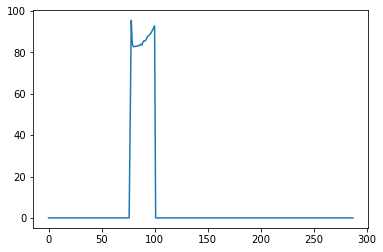

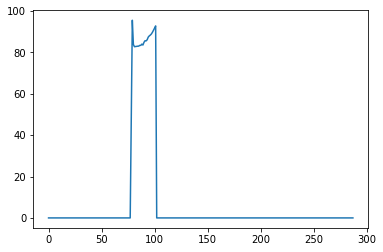

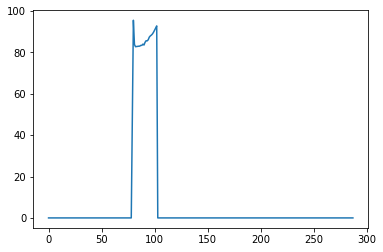

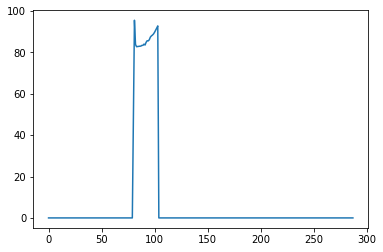

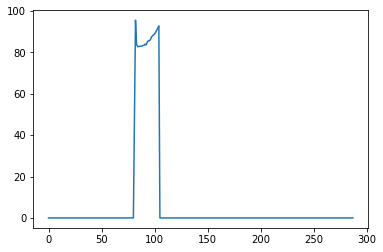

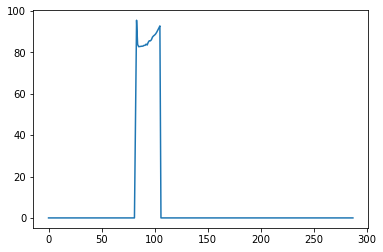

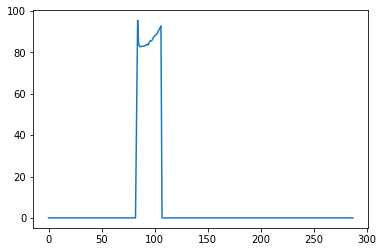

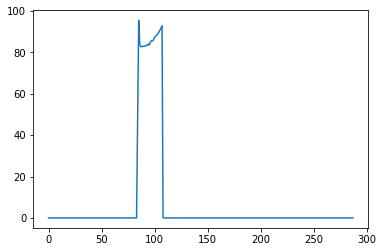

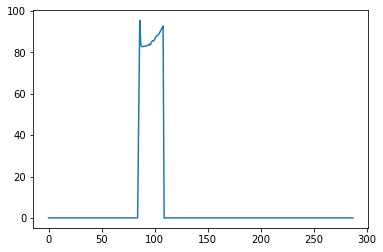

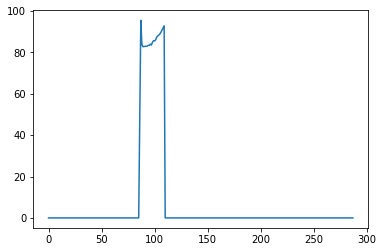

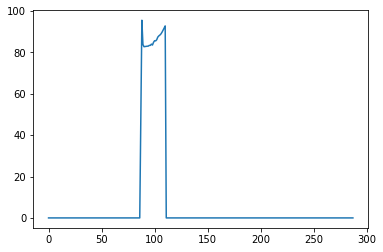

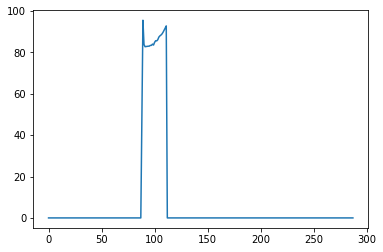

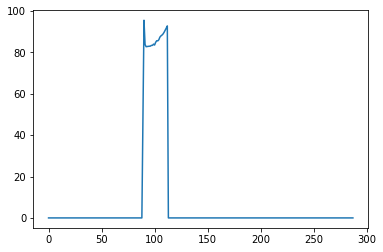

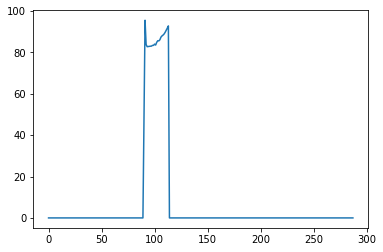

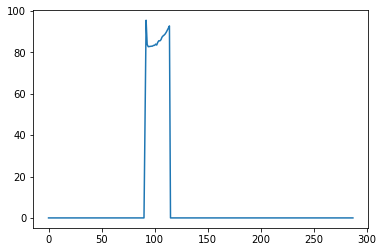

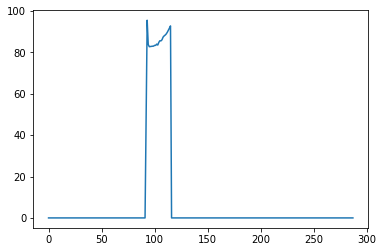

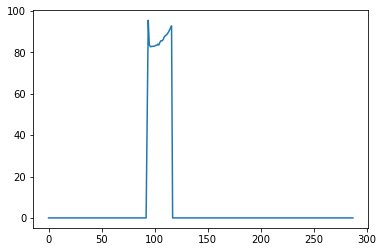

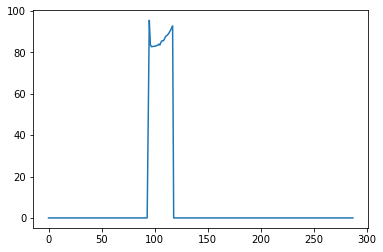

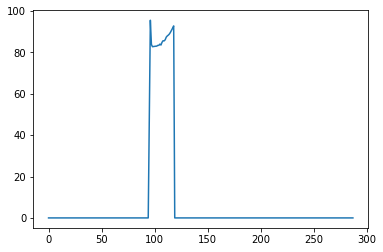

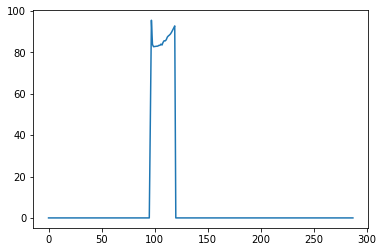

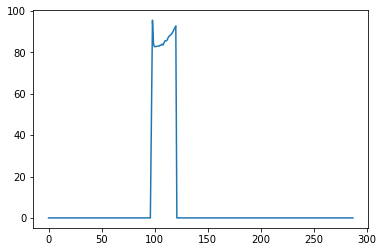

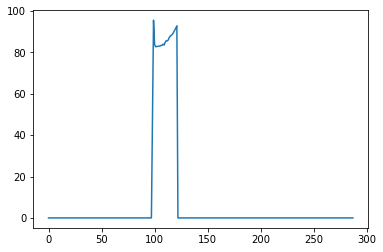

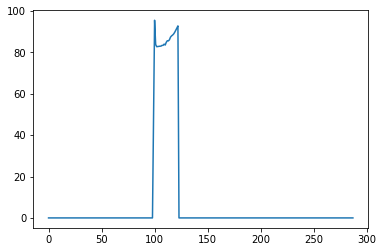

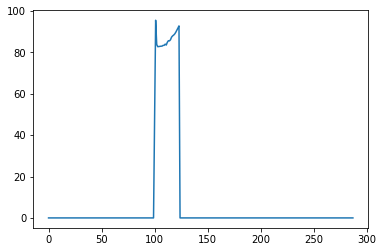

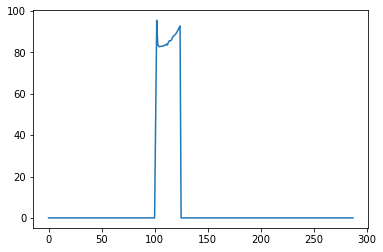

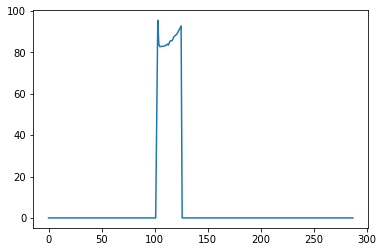

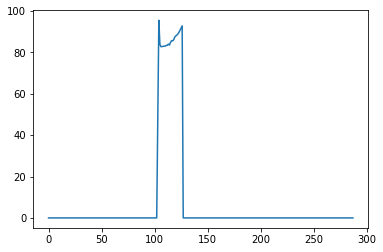

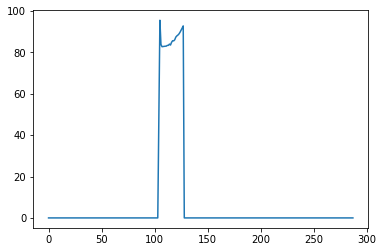

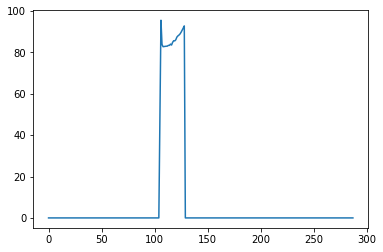

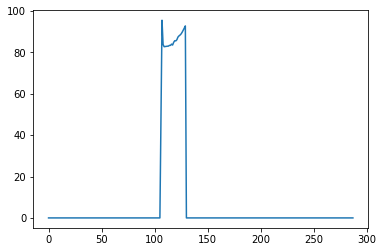

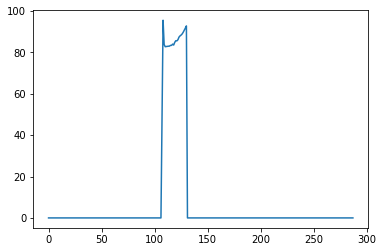

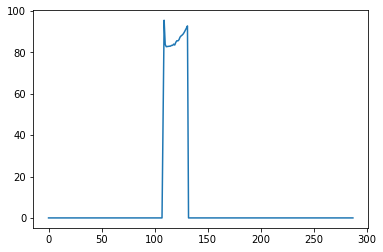

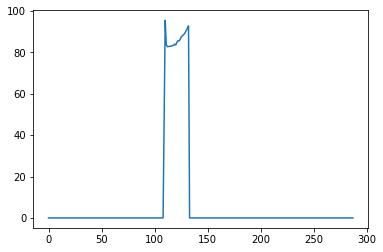

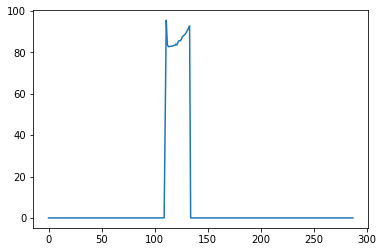

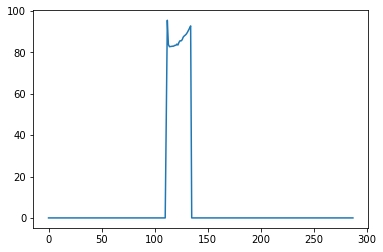

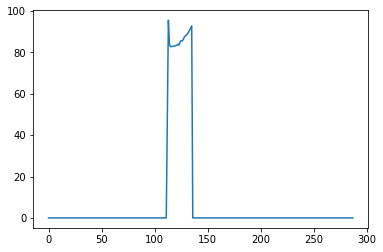

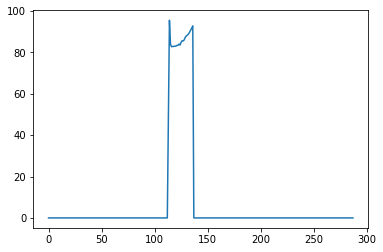

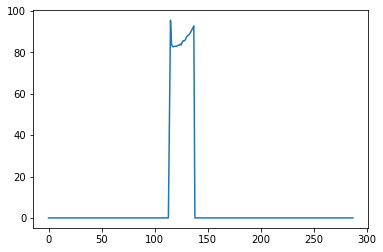

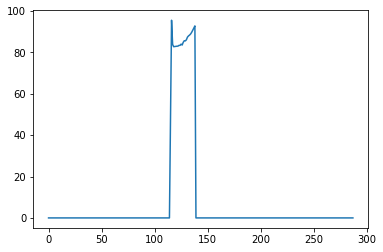

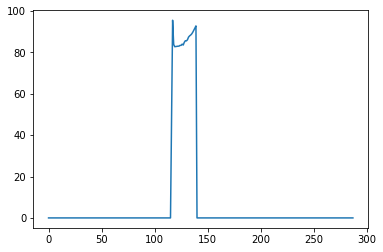

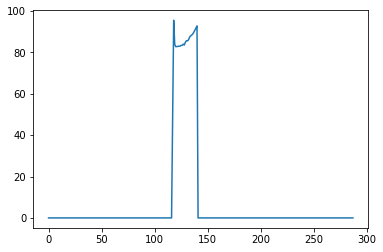

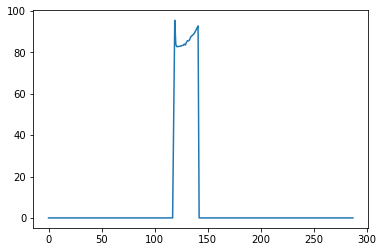

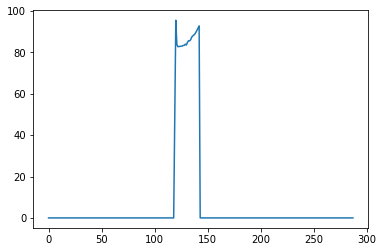

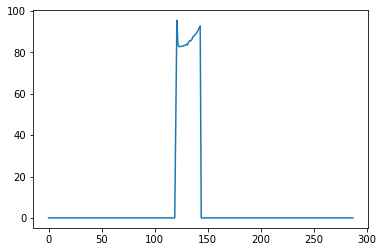

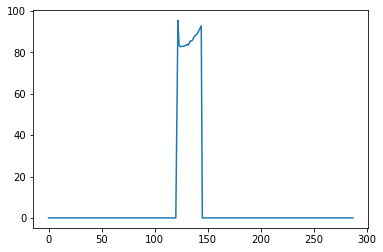

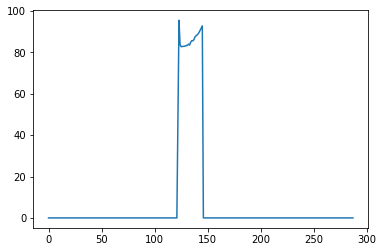

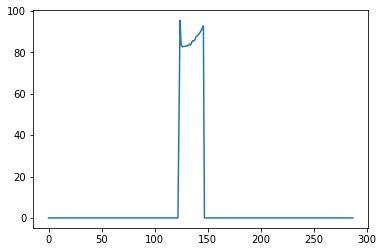

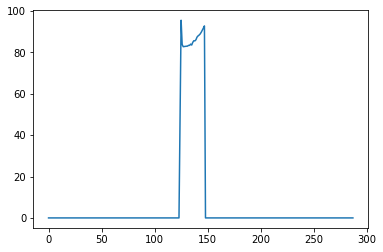

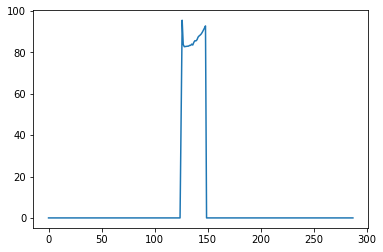

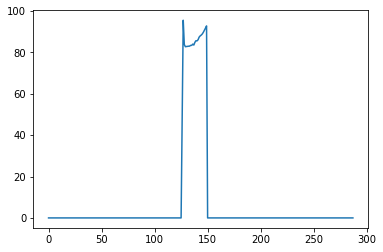

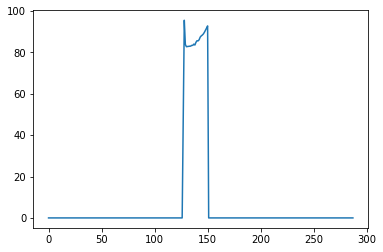

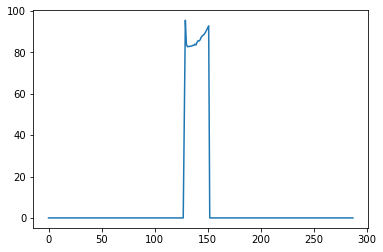

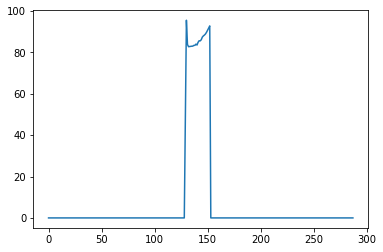

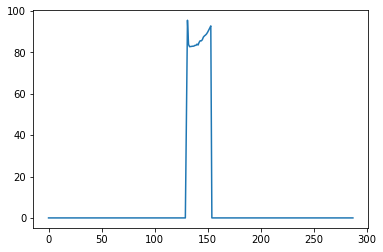

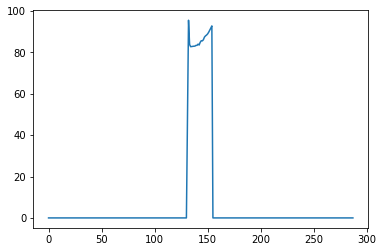

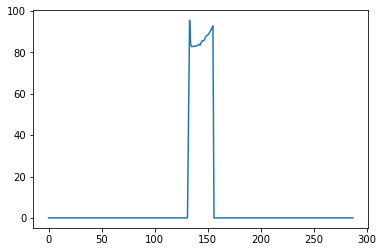

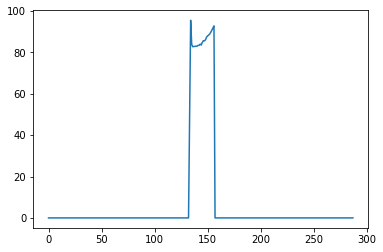

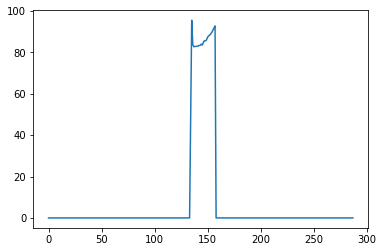

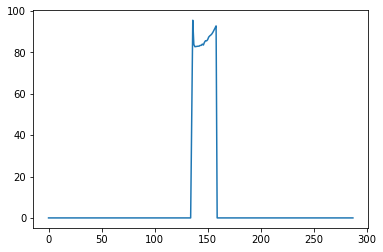

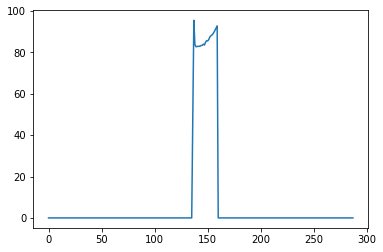

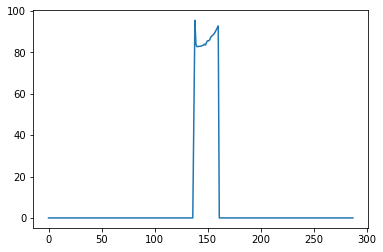

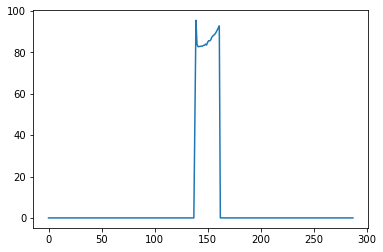

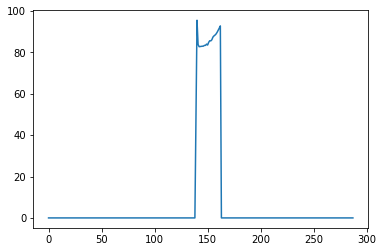

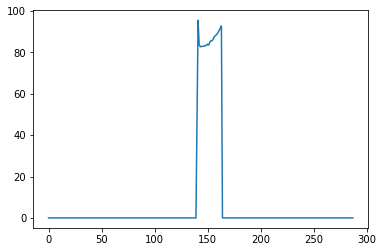

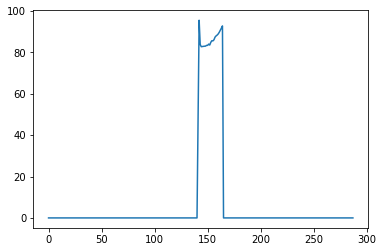

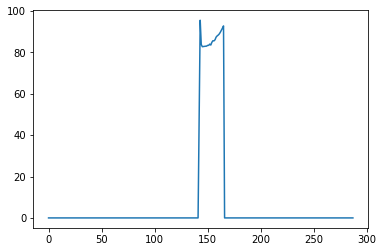

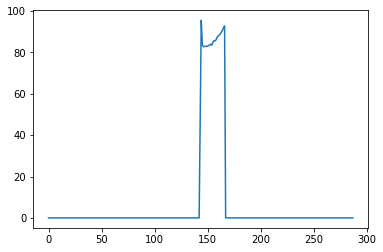

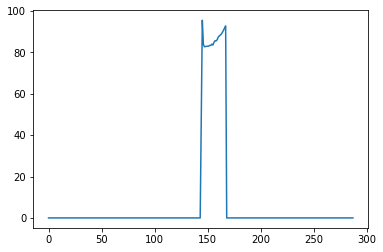

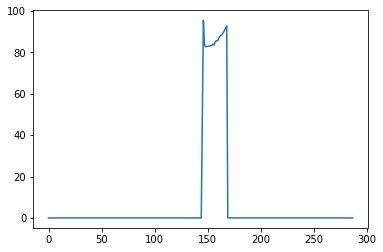

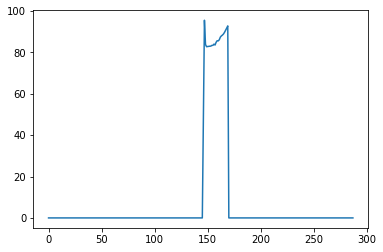

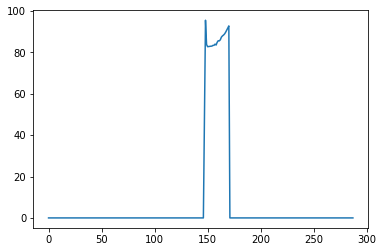

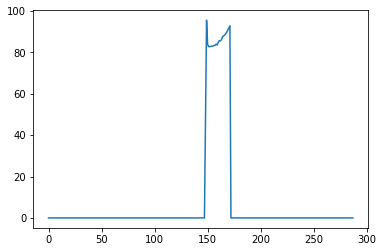

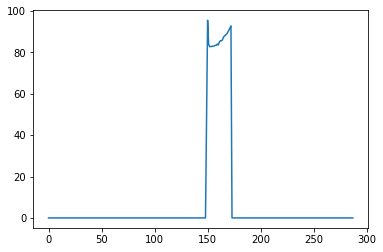

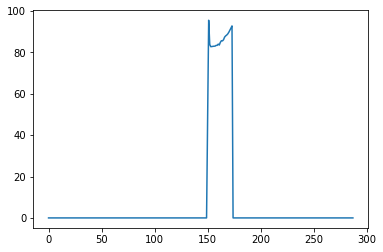

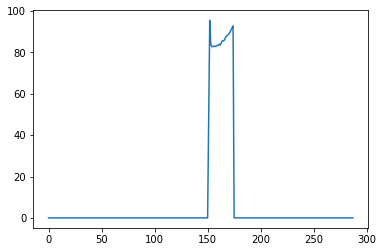

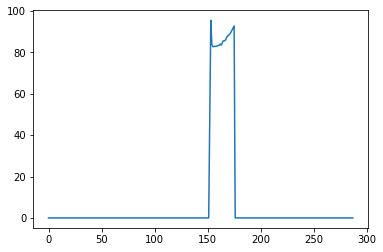

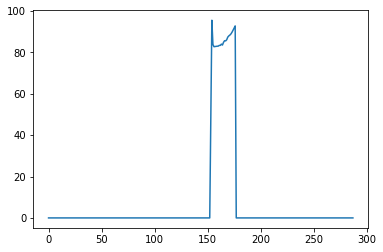

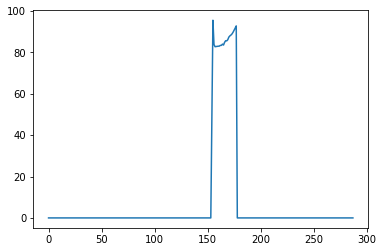

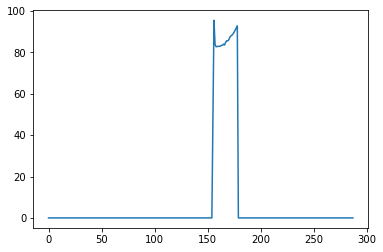

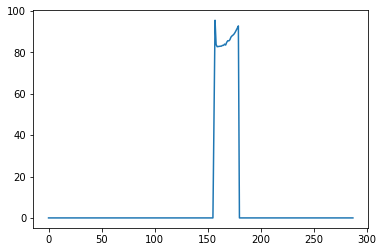

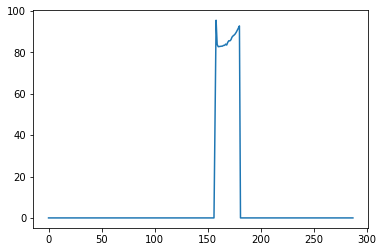

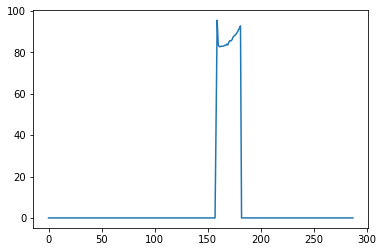

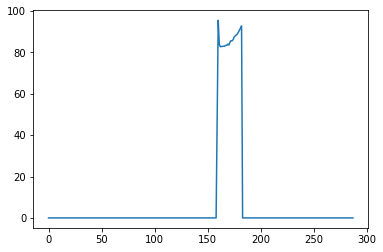

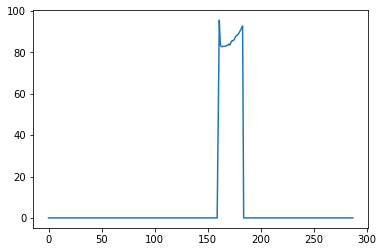

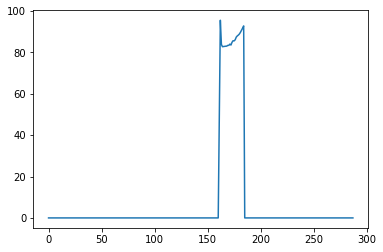

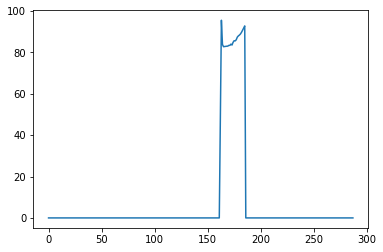

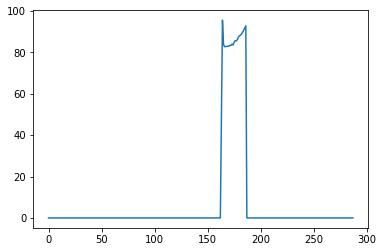

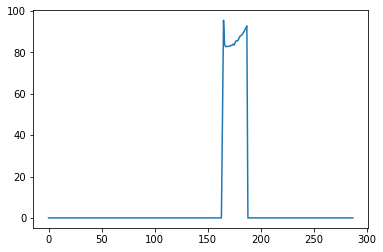

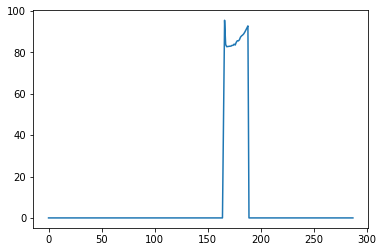

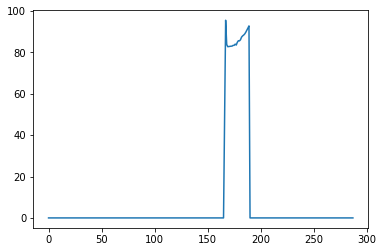

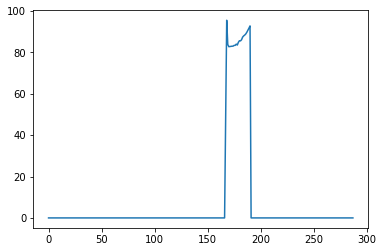

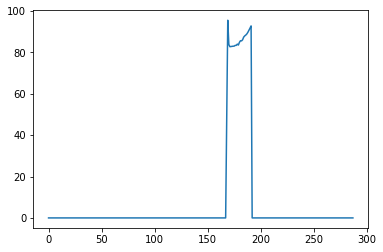

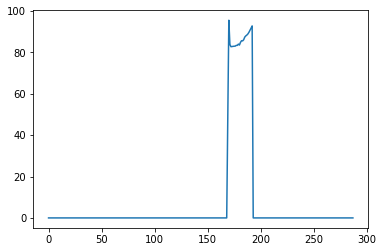

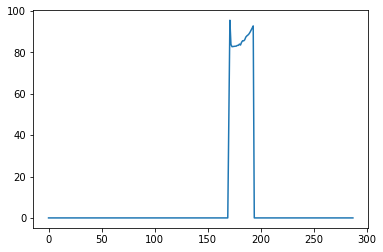

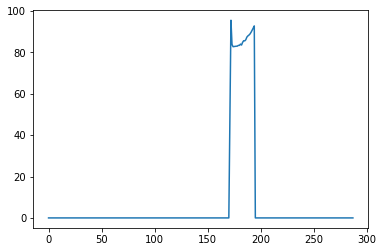

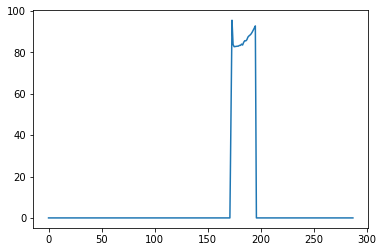

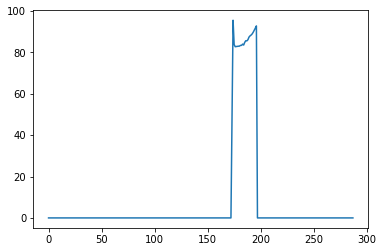

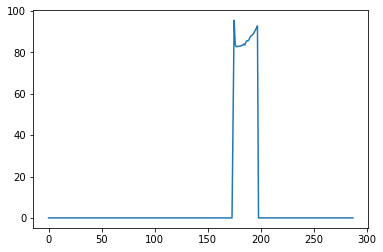

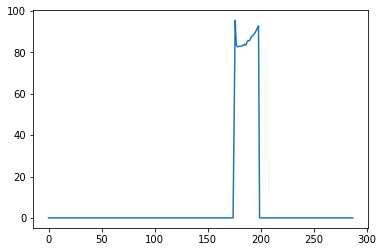

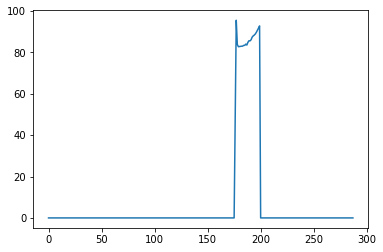

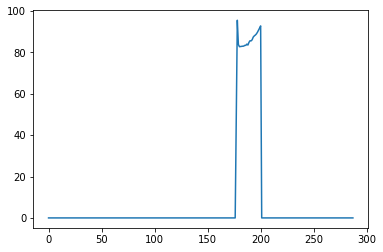

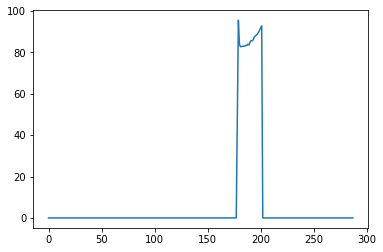

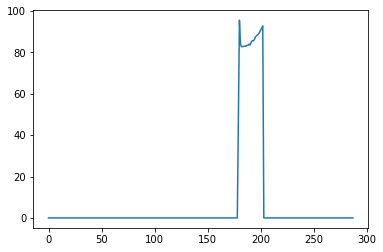

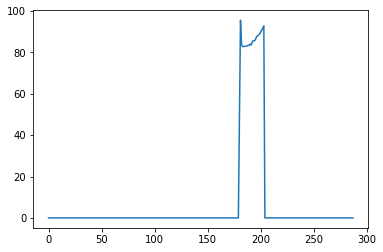

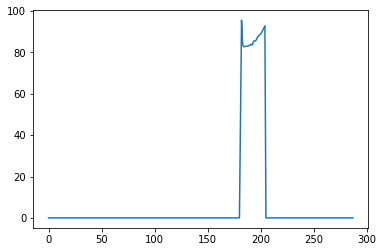

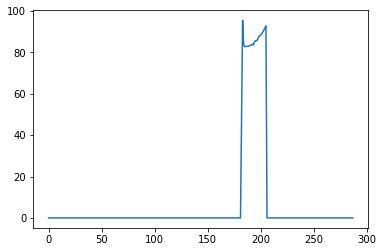

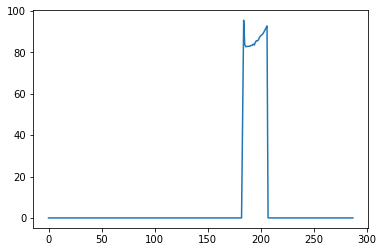

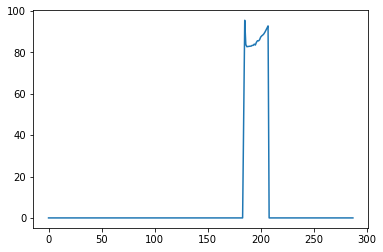

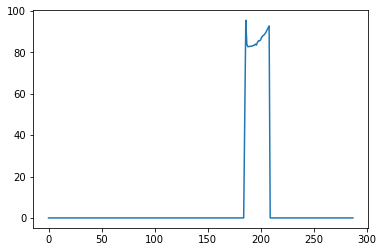

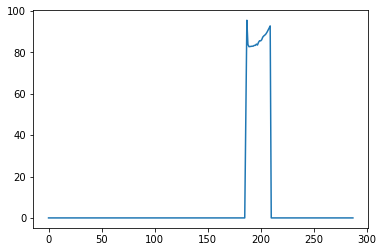

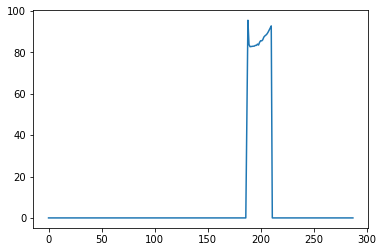

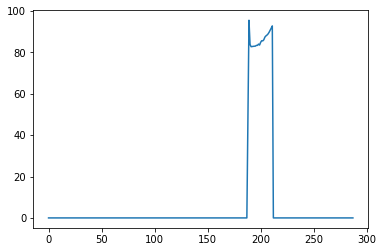

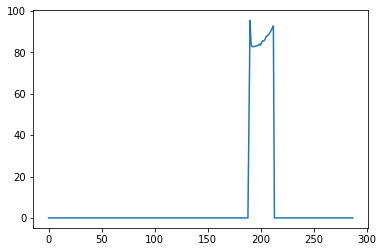

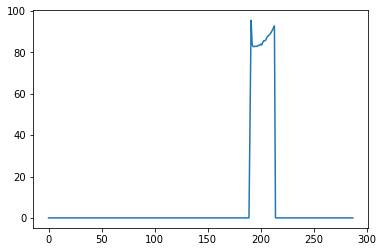

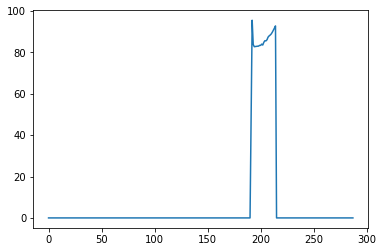

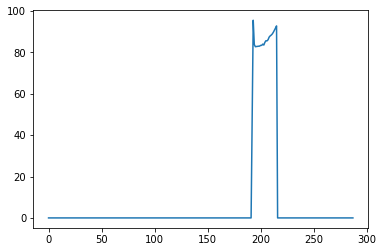

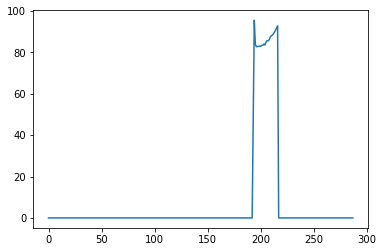

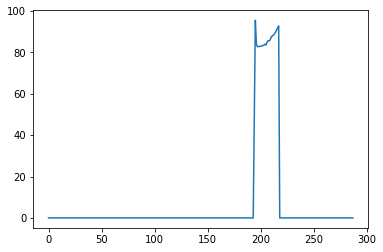

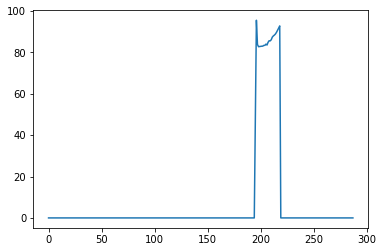

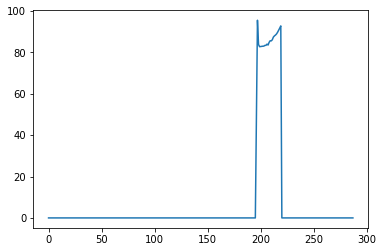

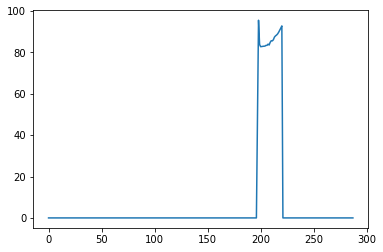

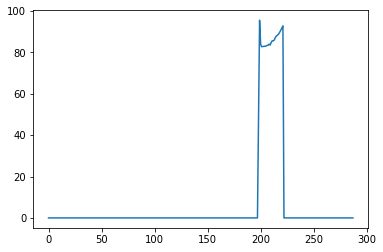

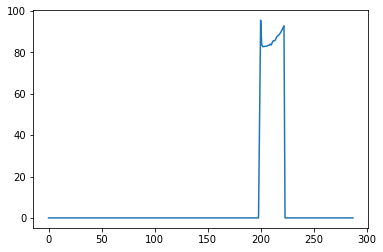

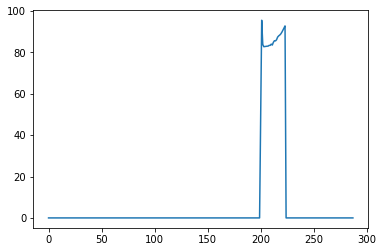

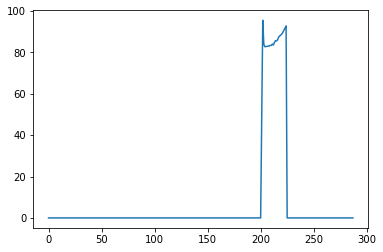

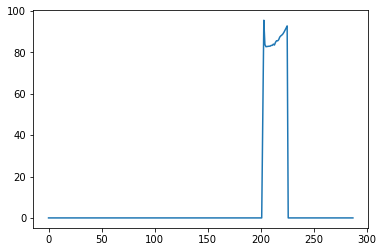

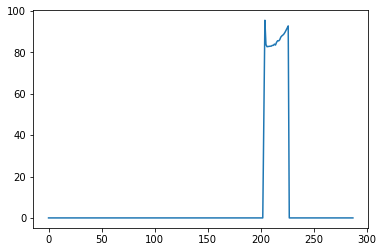

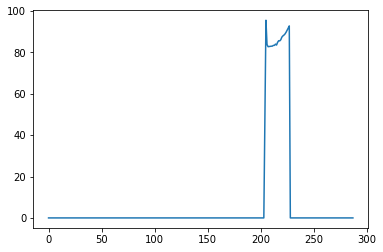

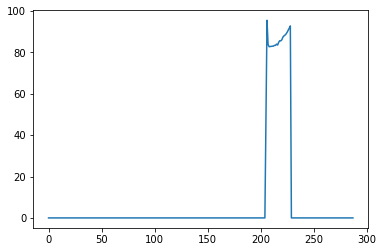

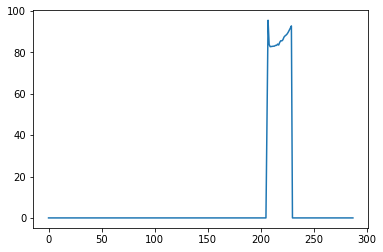

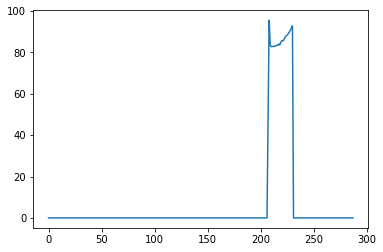

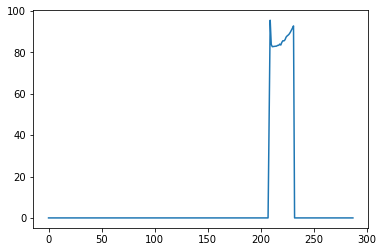

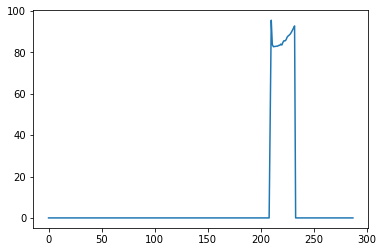

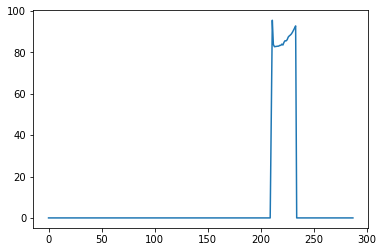

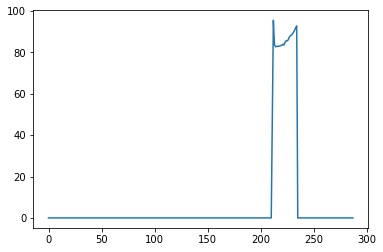

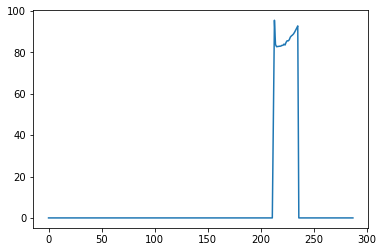

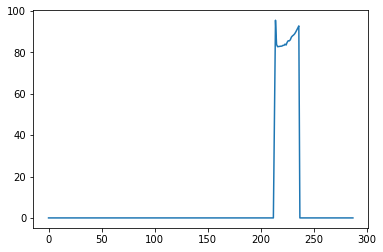

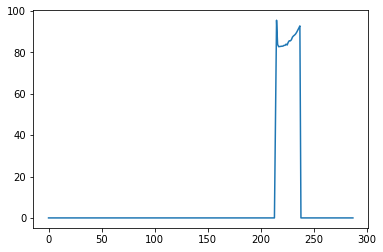

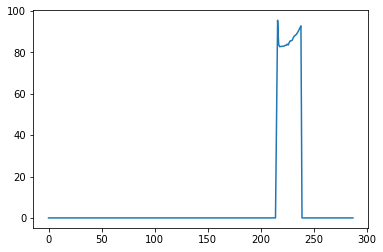

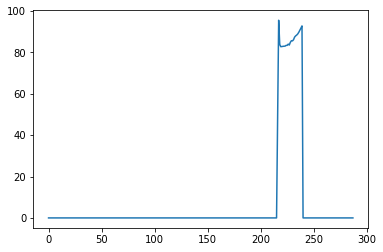

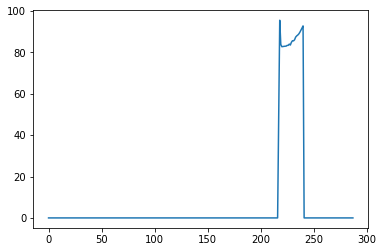

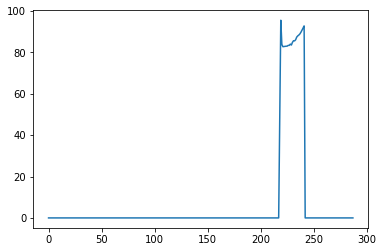

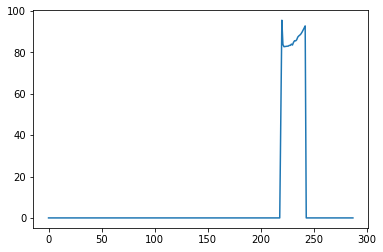

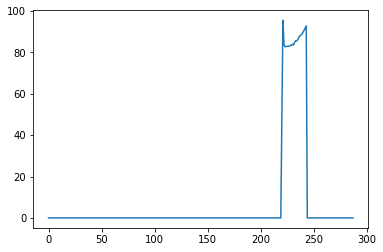

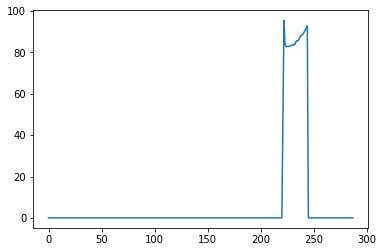

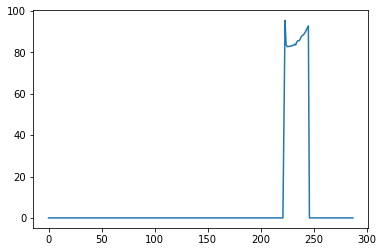

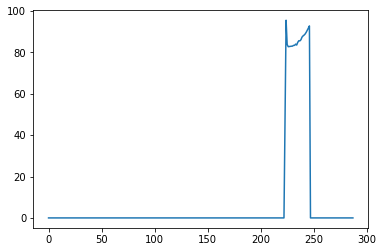

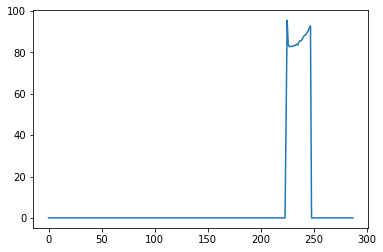

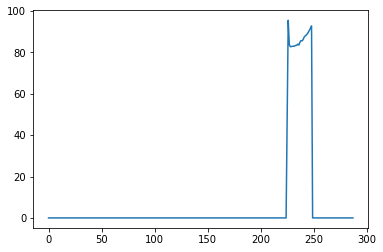

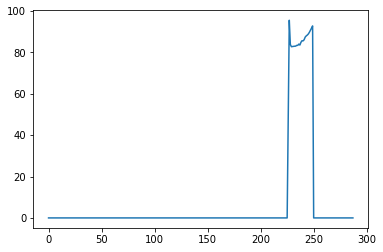

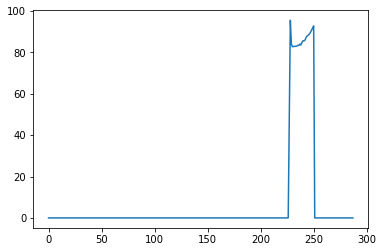

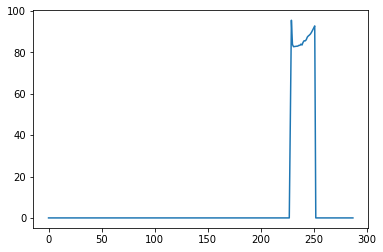

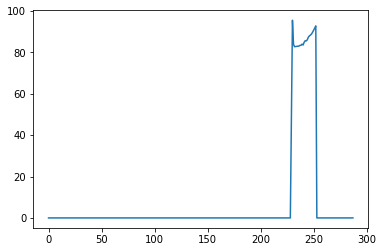

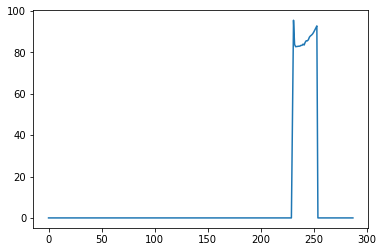

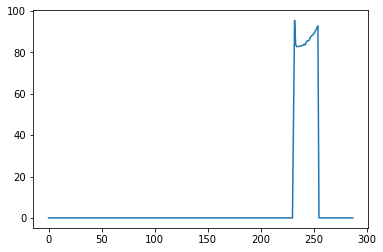

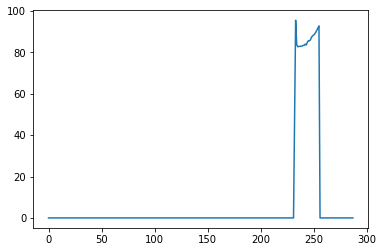

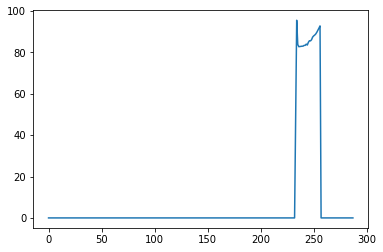

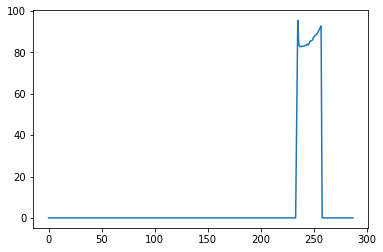

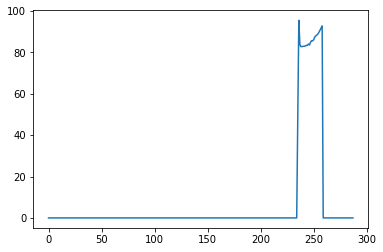

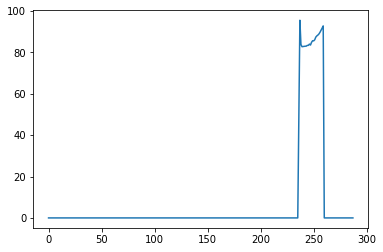

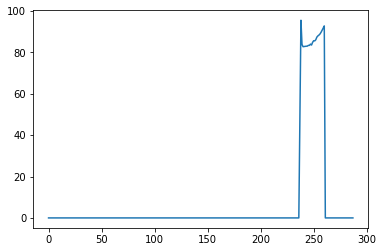

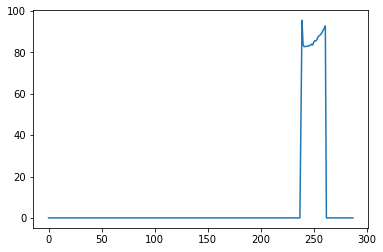

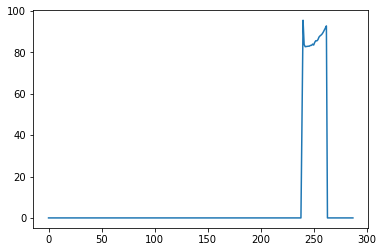

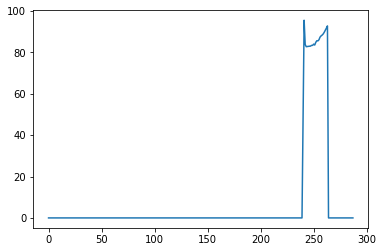

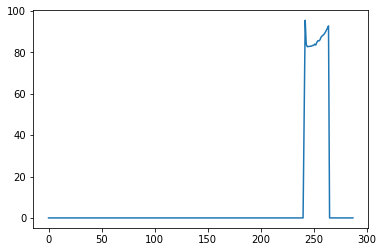

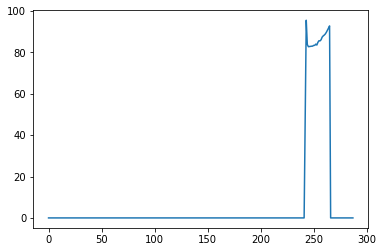

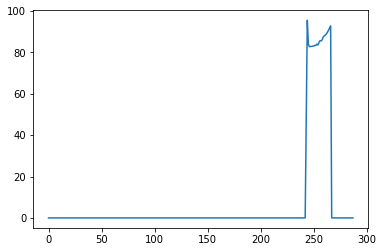

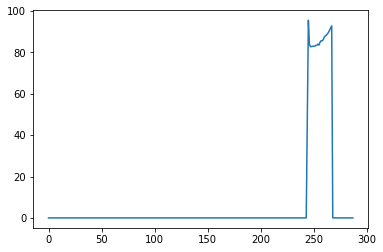

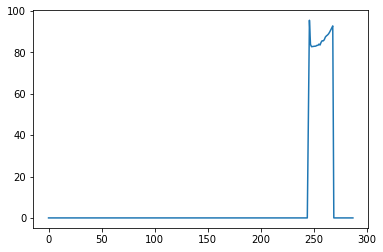

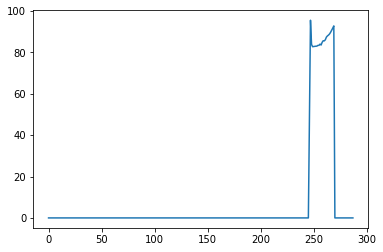

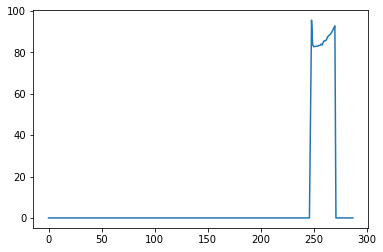

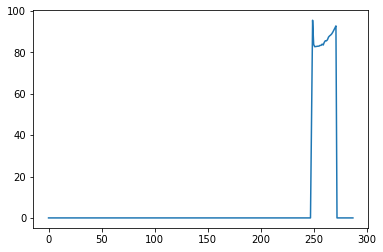

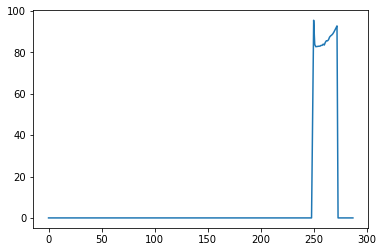

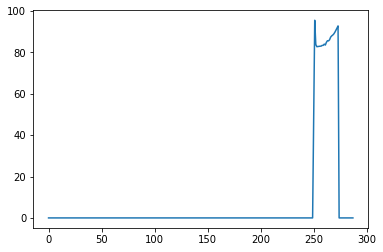

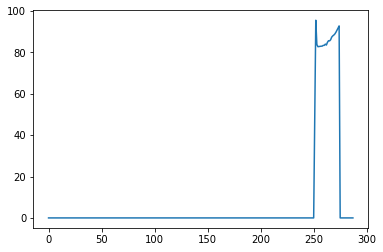

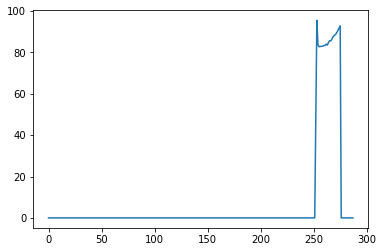

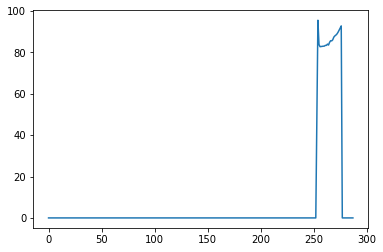

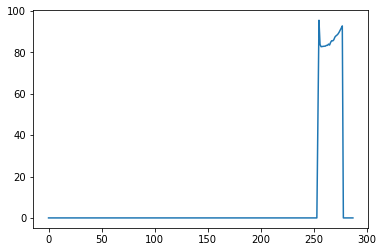

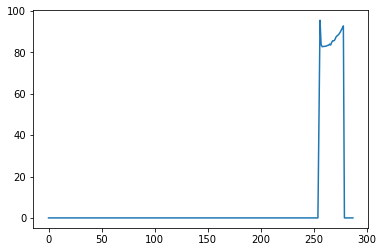

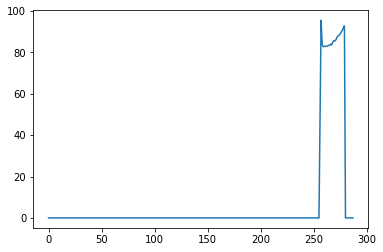

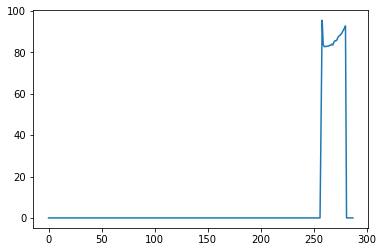

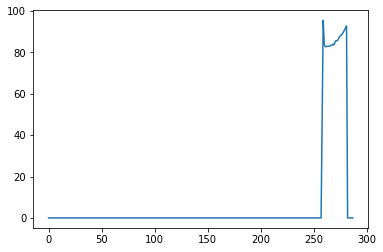

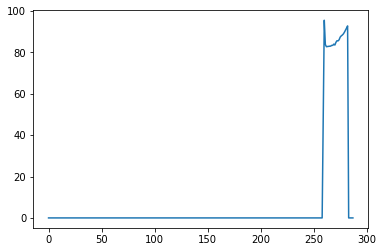

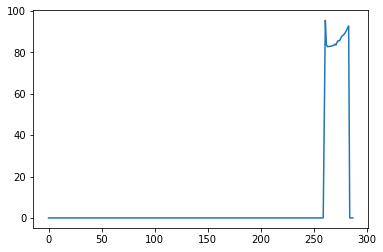

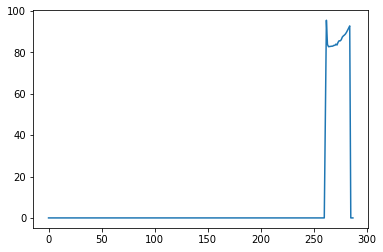

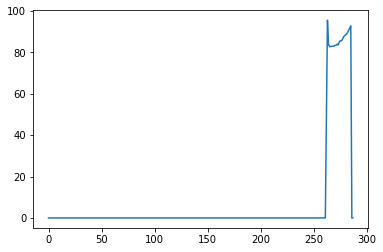

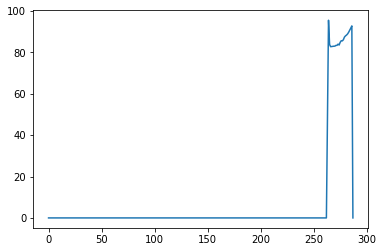

In [56]:
date = '2019-01-05'
load = data.loc[date].load
load.loc[load < 10] = 0
load = load.to_numpy()
non_zero = np.nonzero(load)
start_index = non_zero[0][0]
end_index = non_zero[0][-1]
difference = end_index - start_index
load = data.loc[date].load
load = load.iloc[start_index:end_index].reset_index(drop=True).to_numpy()
# load.plot()
for i in range(288):
    if i + difference < 288:
        y = pd.Series(np.zeros(288))
        y.iloc[i:i+difference] = load
        y.plot()
        plt.show()
    else:
        break


In [2]:
tariffs = tf.read_tariffs()
for tariff in tariffs:
    print(tariff.tariff_type)

TOU
flat
TOU_controlled_load
flat_controlled_load


In [ ]:
# tf.setup_tariff_json()
tariff_name =       'Power Direct'
peak_price =        39.63
shoulder_price =    27.35
off_peak_price =    21.74

fit =               12.4
supply_charge =     78.69

peak        = {(6,10): peak_price, (15,24): peak_price, (0,1): peak_price}
shoulder    = {(10,15): shoulder_price}
off_peak    = {(1,6): off_peak_price}

tou_rate = {**peak, **shoulder, **off_peak}

tariff = tf.TOUTariff(tariff_name=tariff_name, supply_charge=supply_charge, fit=fit, tou_rate=tou_rate)
tariff.write_tariff()


In [6]:
tariff_name =   'OVO One Plan'
flat_rate =     28.6
fit =           8
supply_charge = 85.25
tariff = tf.Flat(tariff_name=tariff_name, supply_charge=supply_charge, fit=fit, flat_rate=flat_rate)
tariff.write_tariff()

writing


In [8]:
tariff_name =       'GloSave CL'
peak_price =        42.90
off_peak_price =    24.92
shoulder_price =    20.49
fit =               9.5
supply_charge =     72.60
controlled_load =   18.28

peak        = {(6,10): peak_price, (15,24): peak_price, (0,1): peak_price}
shoulder    = {(10,15): shoulder_price}
off_peak    = {(1,6): off_peak_price}

tou_rate = {**peak, **shoulder, **off_peak}

tariff = tf.TOUControlledLoad(tariff_name=tariff_name,
                              supply_charge=supply_charge,
                              fit=fit,
                              tou_rate=tou_rate,
                              controlled_load=controlled_load)
tariff.write_tariff()

tariffNameAlinta Energy CL
writing


In [3]:
tariff_name =   'Red Energy MSO CL'
flat_rate =     34.96
fit =           11.5
supply_charge = 117.70
controlled_load=19.20
tariff = tf.FlatControllableLoad(tariff_name=tariff_name,
                                supply_charge=supply_charge,
                                fit=fit,
                                flat_rate=flat_rate,
                                controllable_load_tariff=controlled_load)
tariff.write_tariff()


flat_controllable_load
writing
